# Analyze based on semantic categories

1.) change tfidf so we compare equivalent categories only - done
2.) update ranking accordingly

In [13]:
import os
from collections import Counter, defaultdict
import csv
import pandas as pd
import numpy as np

pd.set_option('display.max_rows', None)


def get_properties():
    properties = []
    for path in os.listdir('../data/aggregated/'):
        prop = path.split('.')[0]
        if 'female-' not in prop and prop != '':
            properties.append(prop)
    return properties

In [3]:
# check updated corpus extraction
f_original = os.listdir('../contexts/giga_full/vocab')
print(len(f_original))
f_update = os.listdir('../contexts/giga_full_updated/vocab')
print(len(f_update))

1446
1636


## Show top distinctive contexts per property

* calculate mean f1 per sematic category
* rank contexts by mean f1
* only include categories with at least 10 pos and 10 neg examples (small categories distort mean)

In [9]:
pd.set_option('display.max_colwidth', None)
# get top distinctive contexts per prop
import get_top_contexts_distinctiveness

model_name = 'giga_full_updated'
properties = get_properties()
table = get_top_contexts_distinctiveness.get_top_distinctive_contexts(properties, model_name)
df = pd.DataFrame(table)
df.sort_values('f1-mean', ascending = False).round(2)

,property,n_contexts,f1-mean,contexts
9,used_in_cooking,572,0.94,add recipe fish
4,fly,952,0.90,payload study experimental hovering flew overhead
11,green,578,0.86,place shade belongs green citrus
0,square,1504,0.85,built
13,blue,2234,0.85,magic bright scale various european
16,female,45,0.84,actress birth herself
20,lay_eggs,74,0.83,eggs
8,hot,84,0.83,flame oven remove hot
7,sweet,35,0.83,banana potato sweet
14,yellow,52,0.83,sipping operating apple yellow good bubbly apples


In [6]:
# latex table for paper:
cols = ['property', 'n_contexts', 'f1-mean', 'contexts']
df = df.sort_values('f1-mean', ascending = False).round(2)
print(df[cols].to_latex(index=False))

\begin{tabular}{lrrl}
\toprule
        property &  n\_contexts &  f1-mean &                                           contexts \\
\midrule
 used\_in\_cooking &         572 &     0.94 &                                    add recipe fish \\
             fly &         952 &     0.90 &  payload study experimental hovering flew overhead \\
           green &         578 &     0.86 &                   place shade belongs green citrus \\
          square &        1504 &     0.85 &                                              built \\
            blue &        2234 &     0.85 &                magic bright scale various european \\
          female &          45 &     0.84 &                              actress birth herself \\
        lay\_eggs &          74 &     0.83 &                                               eggs \\
             hot &          84 &     0.83 &                              flame oven remove hot \\
           sweet &          35 &     0.83 &                               

In [10]:
# get top distinctive contexts per prop

model_name = 'wiki_updated'
properties = get_properties()
table = get_top_contexts_distinctiveness.get_top_distinctive_contexts(properties, model_name)
df = pd.DataFrame(table)
df.sort_values('f1-mean', ascending = False).round(2)

,property,n_contexts,f1-mean,contexts
9,used_in_cooking,705,0.92,meat food
16,female,109,0.90,la female birth she
4,fly,55,0.90,thrust fly demonstrate bird experimental flown owl
14,yellow,111,0.88,name whiskey beer tribe half
6,wings,332,0.87,birds
13,blue,1819,0.87,simple abundant evening
2,black,820,0.86,north any size black accidentally typical led
19,wheels,105,0.85,chassis driver
11,green,550,0.85,fruits flora green found citrus forest
5,dangerous,627,0.84,hand killing


In [8]:
# latex table for paper:
cols = ['property', 'n_contexts', 'f1-mean', 'contexts']
df = df.sort_values('f1-mean', ascending = False).round(2)
print(df[cols].to_latex(index=False))

\begin{tabular}{lrrl}
\toprule
        property &  n\_contexts &  f1-mean &                                           contexts \\
\midrule
 used\_in\_cooking &         705 &     0.92 &                                          meat food \\
          female &         109 &     0.90 &                                la female birth she \\
             fly &          55 &     0.90 &  thrust fly demonstrate bird experimental flown... \\
          yellow &         111 &     0.88 &                       name whiskey beer tribe half \\
           wings &         332 &     0.87 &                                              birds \\
            blue &        1819 &     0.87 &                            simple abundant evening \\
           black &         820 &     0.86 &      north any size black accidentally typical led \\
          wheels &         105 &     0.85 &                                     chassis driver \\
           green &         550 &     0.85 &             fruits flora green 

## Prepare context annotation

In [ ]:
# import prepare_annotations

# model_name = 'giga_full_updated'
# properties = get_properties()
# #properties_test = ['dangerous', 'cold', 'lay_eggs']
# #properties = [p for p in properties if p not in properties_test]
# #properties = properties_test
# properties = ['dangerous']
# cutoff = 3
# cutoff_concepts = 3

# for prop in properties:
#     print(prop)
    
#     prepare_annotations.aggregate_contexts(prop, cutoff, model_name)
#     prepare_annotations.prepare_annotation(prop, model_name, cutoff, cutoff_concepts)

### Transfer giga to wiki annotations 


In [11]:
# run: python transfer_annotations.py

### Complete annotations

In [2]:
import analyze_annotations
import numpy as np
import pandas as pd

In [5]:
model_name = 'wiki_updated'
top_cutoff = 3
concept_cutoff = 3
ann_dict = analyze_annotations.show_annotation_status(model_name, top_cutoff, concept_cutoff)

completed:

black (821, 634, 187)
blue (1820, 1018, 802)
cold (591, 382, 209)
dangerous (628, 392, 236)
female (110, 97, 13)
fly (56, 41, 15)
green (551, 402, 149)
hot (93, 78, 15)
juicy (123, 59, 64)
lay_eggs (27, 18, 9)
made_of_wood (498, 373, 125)
red (1276, 781, 495)
roll (3486, 1464, 2022)
round (1035, 886, 149)
square (443, 214, 229)
sweet (27, 20, 7)
swim (1701, 1225, 476)
used_in_cooking (706, 492, 214)
warm (1182, 573, 609)
wheels (106, 66, 40)
wings (333, 234, 99)
yellow (112, 108, 4)

Incomplete:



### Consistency checks

1.) Consistency between the corpora - done

2.) Property words - done

3.) Instances that are positive examples - done

4.) Sample instances and let them be double-annotated?

In [37]:
def get_agreement_corpora(prop, model_name1, model_name2, top_cutoff, concept_cutoff):
    table = []
    ann_dict1 = analyze_annotations.get_evidence_dict(model_name1, prop, top_cutoff, concept_cutoff)
    ann_dict2 = analyze_annotations.get_evidence_dict(model_name2, prop, top_cutoff, concept_cutoff)

    all_words = set(ann_dict1.keys()).union(ann_dict2.keys())

    for w in all_words:
        wd = dict()
        wd['context'] = w
        if w in ann_dict1:
            l1 = ann_dict1[w]
        else:
            l1 = 'nic'
        if w in ann_dict2:
            l2 = ann_dict2[w]
        else:
            l2 = 'nic'
        wd[model_name1] = l1
        wd[model_name2] = l2
        wd['agreement'] = True
        wd['overlap'] = False
        if 'nic' not in [l1, l2]:
            wd['overlap'] = True
            if l1 != l2:
                wd['agreement'] = False
        else:
            wd['agreement'] = '-'
        table.append(wd)
    return table


def check_for_property_words(model_name, top_cutoff, concept_cutoff):
    
    prop_word_dict = {
        'lay_eggs': {'egg',  'eggs', 'lay', 'laying', 'laid', 'lays'},
        'used_in_cooking': {'cook', 'cooked', 'cooks', 'cooking'},
        'cold': {'cold', 'cool', 'colder', 'coldest'},
        'warm' : {'warm', 'warmer', 'warmest'},
        'sweet': {'sweeter', 'sweetest'},
        'made_of_wood': {'wood', 'wooden'},
        'wings': {'wing', 'wings'},
        'swim': {'swim', 'swam', 'swimming', 'swims'},
        'fly': {'fly', 'flies', 'flew', 'flying', 'flown'},
        'roll': {'roll', 'rolled', 'rolling', 'rolls'},
        'hot': {'hot', 'hotter', 'hottest'},
        'wing': {'wings', 'wing', 'winged'},
        'wheels': {'wheel',  'wheels', 'wheeled'},
        
    }
    
    properties = get_properties()
    properties.append('female')
    properties = set(properties)
    
    for prop in properties:
        ann_dict = analyze_annotations.get_evidence_dict(model_name, prop, top_cutoff, concept_cutoff)
        if prop in prop_word_dict:
            prop_words = prop_word_dict[prop]
        else:
            prop_words = {prop}
        for w, l in ann_dict.items():
            if w in prop_words and l != 'p':
                print(prop, w, l)
        
    
    
    

In [108]:
model_name1 = 'wiki_updated'
model_name2 = 'giga_full_updated'
top_cutoff = 3
concept_cutoff = 3

properties = get_properties()


for prop in properties:
    table = get_agreement_corpora(prop, model_name1, model_name2, top_cutoff, concept_cutoff)
    df = pd.DataFrame(table)
    df_short = df[df['agreement'] == False]
    print(prop, len(df_short))
    if len(df_short) > 0:
        break
    

square 0
warm 0
black 0
red 0
fly 0
dangerous 0
wings 0
sweet 0
hot 0
used_in_cooking 0
juicy 0
green 0
made_of_wood 0
blue 0
yellow 0
roll 0
female 0
cold 0
round 0
wheels 0
lay_eggs 0
swim 0


In [109]:
df_short

,context,wiki_updated,giga_full_updated,agreement,overlap


In [44]:
model_name = 'wiki_updated'
top_cutoff = 3
concept_cutoff = 3
check_for_property_words(model_name, top_cutoff, concept_cutoff)

In [45]:
model_name = 'giga_full_updated'
top_cutoff = 3
concept_cutoff = 3
check_for_property_words(model_name, top_cutoff, concept_cutoff)

cold cool n


In [101]:
# instances
import analyze_evidence


model_name = 'wiki_updated'
top_cutoff = 3
concept_cutoff = 3

properties = set(get_properties())
properties.add('female')


for prop in properties:
    prop_data = analyze_evidence.load_prop_data(prop)
    pos_labels = ['all', 'all-some', 'some', 'few-some']
    pos_concepts = [c for c, d in prop_data.items() if d['ml_label'] in pos_labels]


    # check annotations
    ann_dict = analyze_annotations.get_evidence_dict(model_name, prop, top_cutoff, concept_cutoff)

    for w, l in ann_dict.items():
        if w in pos_concepts and l != 'i':
            print(prop, w, l)

hot charcoal r
hot heat p
round chocolate u
juicy juice p
made_of_wood bamboo p
made_of_wood timber p
made_of_wood wood p
made_of_wood oak p
made_of_wood pine p
warm smoke r
warm winter r
swim bay r
roll wheel l
roll plastic u
roll cloth u
roll axle l
roll paint u
roll pig u
roll rail r
roll bearing l
roll saw u
wheels wheel p


### Evidence density

*How many of the evidence candidates are actual property evidence? How are they distributed over differnt types of evidence?*

In [39]:
model_name = 'giga_full_updated'
top_cutoff = 3
concept_cutoff = 3
ann_dict = analyze_annotations.show_annotation_status(model_name, top_cutoff, concept_cutoff)
properties = ann_dict['complete']


cols = ['property', 'u', 'all', 'prop_specific', 'non-specific', 'p', 'n', 'l', 'i', 'r', 'b']
table = []
for prop in properties:
    d = dict()
    d['property'] =  prop
    d.update(analyze_annotations.get_evidence_density(model_name, prop, top_cutoff, concept_cutoff))
    for c in cols:
        if c not in d:
            d[c] = np.nan
    table.append(d)
   
cols = ['property', 'u', 'all', 'prop_specific', 'non-specific', 'p', 'n', 'l', 'i', 'r', 'b']
df = pd.DataFrame(table)[cols]
df = df[cols].sort_values('all', ascending = False)
median = df.median(axis=0)
df.loc['median'] = median

df.round(3)
print(df.round(3).fillna('-').to_latex(index=False))

completed:

black (1150, 0, 1150)
blue (2235, 0, 2235)
cold (1082, 0, 1082)
dangerous (1115, 0, 1115)
female (46, 0, 46)
fly (953, 0, 953)
green (579, 0, 579)
hot (85, 0, 85)
juicy (811, 0, 811)
lay_eggs (75, 0, 75)
made_of_wood (787, 0, 787)
red (1768, 0, 1768)
roll (3887, 0, 3887)
round (521, 0, 521)
square (1505, 0, 1505)
sweet (36, 0, 36)
swim (1382, 0, 1382)
used_in_cooking (573, 0, 573)
warm (2109, 0, 2109)
wheels (245, 0, 245)
wings (561, 0, 561)
yellow (53, 0, 53)

Incomplete:

\begin{tabular}{lrrlrlllrll}
\toprule
        property &      u &    all & prop\_specific &  non-specific &      p &      n &      l &      i &      r &      b \\
\midrule
 used\_in\_cooking &  0.355 &  0.645 &         0.014 &         0.631 &  0.007 &  0.003 &  0.003 &  0.329 &  0.302 &      - \\
           sweet &  0.400 &  0.600 &         0.057 &         0.543 &  0.057 &      - &      - &  0.543 &      - &      - \\
          female &  0.622 &  0.378 &         0.067 &         0.311 &      - &      - & 

In [6]:
#

### Evidence diversity and coherence

*How many different words are used to express property evidence?*

In [44]:
# run: python get_diversity_coherence.py (change model name and path)

# load results:

model_name = 'wiki_updated'

path_table = f'../analysis/diversity-coherence-{model_name}.csv'
path_table_median = f'../analysis/diversity-coherence-{model_name}-median.csv'
df = pd.read_csv(path_table)#.round(2)
df.drop(['Unnamed: 0'], axis=1, inplace=True)

median = df.median(axis=0)
df.loc['median'] = median

df = df.round(2)
df = df.fillna('-')
df.to_csv(path_table_median)

print(df.to_latex(index=False))
#df

\begin{tabular}{lrrrlrr}
\toprule
        property &  all-div &  all-sim &  prop\_specific-div & prop\_specific-sim &  non-specific-div &  non-specific-sim \\
\midrule
            roll &    130.0 &     0.15 &               10.0 &              0.26 &             120.0 &              0.15 \\
    made\_of\_wood &     43.0 &     0.17 &                9.0 &              0.38 &              34.0 &              0.15 \\
 used\_in\_cooking &    268.0 &     0.19 &                9.0 &              0.41 &             259.0 &              0.19 \\
             hot &     25.0 &     0.21 &                8.0 &              0.23 &              17.0 &              0.21 \\
            warm &     87.0 &     0.14 &                7.0 &              0.34 &              80.0 &              0.13 \\
           wings &     57.0 &     0.20 &                6.0 &              0.54 &              51.0 &              0.19 \\
       dangerous &     75.0 &     0.17 &                6.0 &              0.28 &         

### Evidence distinctiveness

In [3]:
# import json
# import csv
# import os
# from collections import Counter, defaultdict
import analyze_evidence

import pandas as pd
pd.set_option("display.max_rows", None, "display.max_columns", None)

In [5]:
prop = 'juicy'
model_name = 'giga_full_updated'
top_cutoff = 3
concept_cutoff = 3
table = analyze_evidence.get_top_ev_categories(prop, model_name, top_cutoff, concept_cutoff)
table_mean = analyze_evidence.get_mean_ev_categories(prop, model_name, top_cutoff, concept_cutoff)
for k, d in table.items():
    d['f1_max'] = d['f1']
    d.pop('f1')
    d_mean = table_mean[k]
    d['f1_mean'] = d_mean['f1']

cols = ['f1_mean', 'f1_max', 'contexts', 'pos', 'neg']
df = pd.DataFrame(table)
df = df.T[cols]
df

f1_mean f1_max      contexts pos neg
vegetable prop_specific     0.7   0.79        juices  15  14
          non_specific     0.52   0.82         fruit  15  14
          p                 0.7   0.79        juices  15  14
          i                0.52   0.82         fruit  15  14
          r                0.53   0.76         fresh  15  14
          u                0.52    0.9           for  15  14
plant     prop_specific    0.73   0.73  juices juice  59  28
          non_specific     0.44    0.8          ripe  59  28
          p                0.73   0.73  juices juice  59  28
          i                0.43   0.79     pineapple  59  28
          r                0.48    0.8          ripe  59  28
          u                0.44    0.8        banana  59  28
fruit     prop_specific     0.8    0.8         juice  53  25
          non_specific     0.54   0.85     pineapple  53  25
          p                 0.8    0.8         juice  53  25
          i                0.53   0.85     pineapple  53  25
          r                0.66   0.81         fresh  53  25
          u                0.43   0.81           red  53  25
object    prop_specific    0.76   0.79        juices  73  50
          non_specific     0.53   0.81     pineapple  73  50
          p                0.76   0.79        juices  73  50
          i                0.52   0.81     pineapple  73  50
          r                0.58   0.78          ripe  73  50
          u                0.48   0.76        bright  73  50
food      prop_specific    0.69   0.71        juices  83  41
          non_specific     0.49   0.79     pineapple  83  41
          p                0.69   0.71        juices  83  41
          i                0.48   0.79     pineapple  83  41
          r                0.52   0.74          ripe  83  41
          u                0.46   0.76        bright  83  41
all       prop_specific    0.72   0.74        juices  88  60
          non_specific     0.52    0.8     pineapple  88  60
          p                0.72   0.74        juices  88  60
          i                0.51    0.8     pineapple  88  60
          r                0.55   0.73          ripe  88  60
          u                0.47   0.73           red  88  60

In [6]:
#print(df.to_latex())

In [3]:
#

In [13]:
model_name = 'wiki_updated'
top_cutoff = 3
concept_cutoff = 3

pd.options.display.float_format = "{:,.2f}".format

properties = get_properties()
prop_table = []
for prop in properties:
    table = analyze_evidence.get_top_ev_categories(prop, model_name, top_cutoff, concept_cutoff)
    table_mean = analyze_evidence.get_mean_ev_categories(prop, model_name, top_cutoff, concept_cutoff)
    for k, d in table.items():
        d['f1_max'] = d['f1']
        d.pop('f1')
        d_mean = table_mean[k]
        d['f1_mean'] = d_mean['f1']
    type_scores = defaultdict(list)
    ev_type_mean_scores = dict()
    for (cat, ev_type), f1_dict in table.items():
        type_scores[f'{ev_type}-mean'].append(f1_dict['f1_mean'])
        type_scores[f'{ev_type}-max'].append(f1_dict['f1_max'])

    for ev_type, scores in type_scores.items():
        mean = sum(scores)/len(scores)
        prop_dict = dict()
        ev_type_mean_scores[ev_type] = mean
    prop_dict['property'] = prop
    prop_dict.update(ev_type_mean_scores)
    prop_table.append(prop_dict)
    
#cols = ['property','prop_specific', 'non_specific', 'p', 'n', 'l', 'i', 'r', 'b', 'u']
cols = ['property','prop_specific', 'non_specific', 'u']
cols_full = ['property']
for col in cols[1:]:
    for sc in ['mean', 'max']:
        cols_full.append(f'{col}-{sc}')

df = pd.DataFrame(prop_table)
df = df[cols_full].sort_values('prop_specific-mean', ascending = False)
median = df.median(axis=0)
df.loc['median'] = median
df = df.fillna('-')#round(2).fillna('-')
df
print(df.to_latex(index=False))

\begin{tabular}{lllrrrr}
\toprule
        property & prop\_specific-mean & prop\_specific-max &  non\_specific-mean &  non\_specific-max &  u-mean &  u-max \\
\midrule
            blue &               0.84 &              0.84 &               0.64 &              0.85 &    0.62 &   0.87 \\
           green &               0.81 &              0.81 &               0.52 &              0.82 &    0.46 &   0.81 \\
             red &               0.76 &              0.76 &               0.47 &              0.73 &    0.47 &   0.76 \\
             fly &               0.74 &              0.83 &               0.72 &              0.89 &    0.59 &   0.80 \\
           juicy &               0.73 &              0.73 &               0.59 &              0.82 &    0.50 &   0.76 \\
       dangerous &               0.72 &              0.81 &               0.58 &              0.81 &    0.50 &   0.80 \\
          female &               0.72 &              0.80 &               0.70 &              0.88 &    0.

In [19]:
#print(df.to_latex(index=False))

## Evidence strength


In [14]:
import analyze_evidence


def get_tfidf_scores_context(prop, cat, contexts, model_name):
    
    # collect scores here:
    context_tfidf_dict = defaultdict(dict)

    # get tfidf scores
    path_tfidfs = f'../results/{model_name}/tfidf-raw-10000/each_target_vs_corpus_per_category'
    paths_tfidf = [f'{path_tfidfs}/{prop}/{cat}/pos', f'{path_tfidfs}/{prop}/{cat}/neg']
    concept_files = []
    for path in paths_tfidf:
        concept_files.extend([f'{path}/{f}' for f in os.listdir(path) if f.endswith('.csv')])
    for cf in concept_files:
        full_path = cf
        #full_path = f'{path_tfidfs}/{cf}'
        concept = os.path.basename(cf).split('.')[0]
        with open(full_path) as infile:
            data = list(csv.DictReader(infile))
        for cw_target in contexts:
            found = False
            for d in data:
                cw = d['']
                score = d['target']
                if cw == cw_target:
                    context_tfidf_dict[cw][concept] = (float(score))
                    found = True
                    break
            if found == False:
                context_tfidf_dict[cw_target][concept]  = 0.0
    return context_tfidf_dict


def evidence_strength_to_file(prop, et, contexts, model_name, top_cutoff, concept_cutoff):

    filepath_target = f'../analysis/{model_name}/evidence_{top_cutoff}_{concept_cutoff}-raw-10000-categories'
    filepath_target_et = f'{filepath_target}/{prop}/{et}'
    os.makedirs(filepath_target_et, exist_ok=True)
    categories = analyze_evidence.get_categories(prop, model_name)
    tfidf_scores_cats = dict()
              
    for context in contexts:
        full_filepath = f'{filepath_target_et}/{context}.csv'
        for cat in categories:
            tfidf_scores_cats[cat] = get_tfidf_scores_context(prop, cat, contexts, model_name)[context]
            #print(cat, tfidf_scores_cats[cat]['wren'])
        df = pd.DataFrame(tfidf_scores_cats)
        df.fillna(0, inplace=True)
        df['mean'] = df.mean(numeric_only=True, axis = 1)
        df.to_csv(full_filepath)

In [15]:

# extract mean evidence strength for context words that give prop-specific evidence
model_name = 'giga_full_updated'
properties = get_properties()

#properties = ['dangerous']

top_cutoff = 3
concept_cutoff = 3

#ets = ['p', 'n', 'l']
ets = ['i', 'r', 'b']


for prop in properties:
    print(prop)
    table = analyze_evidence.get_top_ev_categories(prop, model_name, top_cutoff, concept_cutoff)

    
    for et_target in ets:
        contexts = set()
        for (cat, et), d in table.items():
            if et_target == et:
                contexts.update(set(d['contexts'].split(' ')))
        if len(contexts) > 0:
            evidence_strength_to_file(prop, et_target, contexts, model_name, top_cutoff, concept_cutoff)

square
warm
black
red
fly
dangerous
wings
sweet
hot
used_in_cooking
juicy
green
made_of_wood
blue
yellow
roll
female
cold
round
wheels
lay_eggs
swim


In [7]:
#prop_dict = analyze_evidence.load_prop_data(prop)
#prop_dict

In [277]:
# compare evidence strength across properties - may not make too much sense...


def get_evidence_strength_props(evidence_types, properties, model_name, top_cutoff, concept_cutoff):

    prop_et_strength_dict = defaultdict(dict)

    path_evidence = f'../analysis/{model_name}/evidence_{top_cutoff}_{concept_cutoff}-raw-10000-categories'

    for prop in properties:
        means_prop = []
        prop_dict = analyze_evidence.load_prop_data(prop)
        # only use pos examples:
        pos_ml_labels = ['all', 'all-some', 'few-some', 'some']
        concepts_pos = [c for c, d in prop_dict.items() if d['ml_label'] in pos_ml_labels]
        for et in evidence_types:
            means_et = []
            path_dir = f'{path_evidence}/{prop}/{et}'
            if os.path.isdir(path_dir):
                ev_files = [f for f in os.listdir(path_dir) if f.endswith('.csv')]
                for f in ev_files:
                    full_path = f'{path_dir}/{f}'
                    with open(full_path) as infile:
                        data = list(csv.DictReader(infile))
                        means = [float(d['mean']) for d in data if d[''] in concepts_pos]
                        if len(means) > 0:
                            mean = sum(means)/len(means)
                        else:
                            mean = 0.0
                        #means_et.append(mean)
                        means_prop.append(mean)
        if len(means_prop) > 0:
            mean_prop = sum(means_prop)/len(means_prop)
        else:
            mean_prop = 0.0
        prop_et_strength_dict[prop]['prop_specific'] = mean_prop
        
    return prop_et_strength_dict


def get_strength_dist_props(evidence_types, properties, model_name, top_cutoff, concept_cutoff):

    prop_et_strength_dict = defaultdict(dict)

    path_evidence = f'../analysis/{model_name}/evidence_{top_cutoff}_{concept_cutoff}-raw-10000-categories'
    
    x_props = []
    y_strengths = []
    labels = []
    for prop in properties:
        means_prop = []
        prop_dict = analyze_evidence.load_prop_data(prop)
        # only use pos examples:
        pos_ml_labels = ['all', 'all-some', 'few-some', 'some']
        concepts_pos = [c for c, d in prop_dict.items() if d['ml_label'] in pos_ml_labels]
        ml_labels_pos = [d['ml_label'] for c, d in prop_dict.items() if d['ml_label'] in pos_ml_labels]
        for concept, l in zip(concepts_pos, ml_labels_pos):
            means_concept = []
            for et in evidence_types:
                path_dir = f'{path_evidence}/{prop}/{et}'
                if os.path.isdir(path_dir):
                    ev_files = [f for f in os.listdir(path_dir) if f.endswith('.csv')]
                    for f in ev_files:
                        full_path = f'{path_dir}/{f}'
                        with open(full_path) as infile:
                            data = list(csv.DictReader(infile))
                        for  d in data:
                            if d[''] == concept:
                                means_concept.append(float(d['mean']))
                        #means = [float(d['mean']) for d in data if d[''] in concepts_pos]
#                         if len(means) > 0:
#                             mean = sum(means)/len(means)
#                         else:
#                             mean = 0.0
                      
            if len(means_concept) > 0:
                mean_concept = sum(means_concept)/len(means_concept)
            else:
                mean_concept = 0.0
            x_props.append(prop)
            y_strengths.append(mean_concept)
            labels.append(l)
            
    df = pd.DataFrame(dict(prop=x_props, strength=y_strengths, label=labels))

                           #label=labels)) #, pairs=all_pairs, rel_names=rel_names))
      
    return df

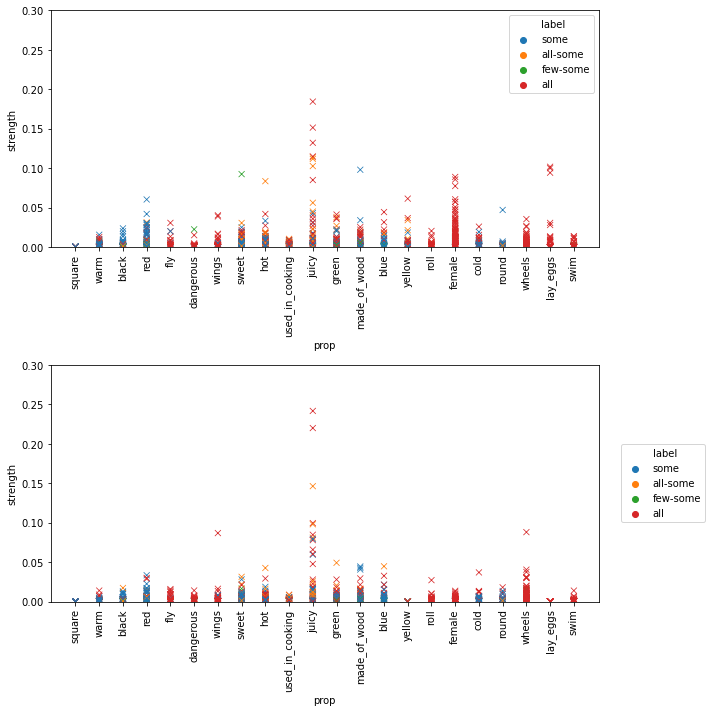

In [283]:
import matplotlib.pyplot as plt
import seaborn as sns

model_names  = ['giga_full_updated',  'wiki_updated']
top_cutoff = 3
concept_cutoff = 3
pair_mode = 'strict'
ets = ['p', 'l', 'n']
ets_string = '_'.join(ets)
properties = get_properties()
#properties = [p for p in properties if p != 'female']

# create figure
#fig = plt.figure(figsize=(20, 5), dpi=80)
fig, axes = plt.subplots(ncols=1, nrows=2, figsize=(10, 10))
axes = axes.flatten()

for n, (model_name, ax) in enumerate(zip(model_names, axes), 1):
    df  = get_strength_dist_props(ets, properties, 
                                  model_name, top_cutoff, concept_cutoff)
    plt.subplot(2, 1, n)
    g = sns.scatterplot(x='prop', y='strength', data=df, hue='label', marker='x')
    g.set(ylim=(0, 0.3))
    plt.xticks(rotation=90)
    axes[n-1] = g
 
plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left", borderaxespad=0)
plt.tight_layout()
plt.savefig(f'../analysis/evidence_strength_props-{ets_string}.png')
plt.show()


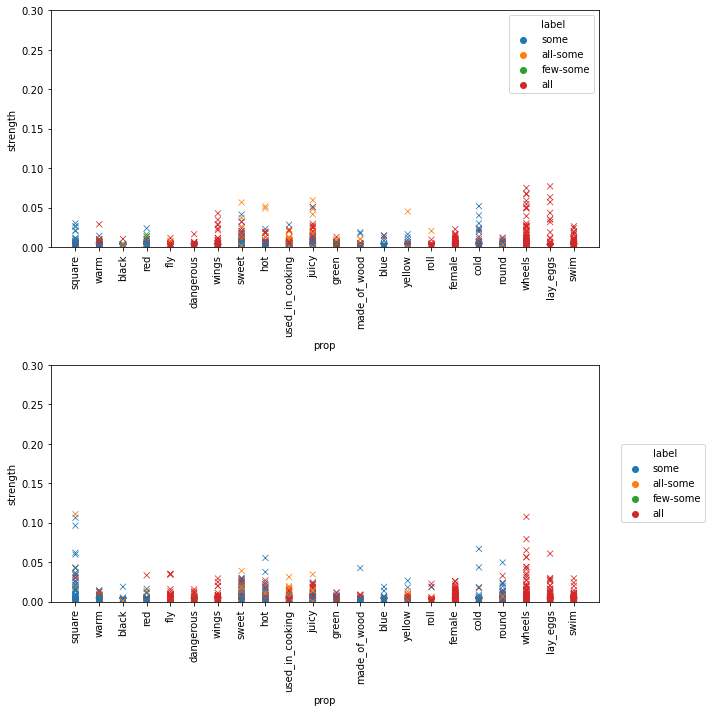

In [285]:
import matplotlib.pyplot as plt
import seaborn as sns

model_names  = ['giga_full_updated',  'wiki_updated']
top_cutoff = 3
concept_cutoff = 3
pair_mode = 'strict'
ets = ['i', 'r', 'b']
ets_string = '_'.join(ets)
properties = get_properties()
#properties = [p for p in properties if p != 'female']

# create figure
#fig = plt.figure(figsize=(20, 5), dpi=80)
fig, axes = plt.subplots(ncols=1, nrows=2, figsize=(10, 10))
axes = axes.flatten()

for n, (model_name, ax) in enumerate(zip(model_names, axes), 1):
    df  = get_strength_dist_props(ets, properties, 
                                  model_name, top_cutoff, concept_cutoff)
    plt.subplot(2, 1, n)
    g = sns.scatterplot(x='prop', y='strength', data=df, hue='label', marker='x')
    g.set(ylim=(0, 0.3))
    plt.xticks(rotation=90)
    axes[n-1] = g
 
plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left", borderaxespad=0)
plt.tight_layout()
plt.savefig(f'../analysis/evidence_strength_props-{ets_string}.png')
plt.show()

## Relation analysis

In [1]:
from statistics import stdev
import numpy as np
import analyze_evidence
import os
import os
from collections import Counter, defaultdict
import csv
import pandas as pd
pd.set_option('display.max_colwidth', None) 

pd.set_option('display.max_rows', None)


def get_properties():
    properties = []
    for path in os.listdir('../data/aggregated/'):
        prop = path.split('.')[0]
        if 'female-' not in prop and prop != '':
            properties.append(prop)
    return properties

In [29]:
# relations to file


def relations_to_file(properties):
    path_dir = '../data/relations'
    os.makedirs(path_dir, exist_ok=True)
    relation_pair_dict = defaultdict(set)
    for prop in properties:
        prop_dict = analyze_evidence.load_prop_data(prop)
        rels_evidence = {'typical_of_property', 'variability_limited',
                         'afforded_usual', 'affording_activity', 
                         'variability_limited_scalar', 'variability_open_scalar'}
        rels_no_evidence = {'typical_of_concept', 'afforded_unusual', 'implied_category', 'variability_open'}

        for c, d in prop_dict.items():
            # sort by lables
            ml_label = d['ml_label']
            if ml_label in {'all', 'some', 'all-some', 'few-some'}:
                l = 'pos'
            elif ml_label in {'few'}:
                l = 'neg' 
            relation_pair_dict[(l,)].add((prop, c))

            # sort by subset of instances
            if ml_label in {'all', 'all-some'}:
                l_qu = 'all'
            elif ml_label in {'some', 'few-some'}:
                l_qu = 'some'
            elif ml_label in {'few'}:
                l_qu = 'few'
            relation_pair_dict[(l_qu,)].add((prop, c))

            # sort relations:
            rel_dict = d['relations']
            prop_rel_dict = defaultdict(list)
            for rel, p in rel_dict.items():
                prop_rel_dict[p].append(rel)
            pos_props = sorted(list(prop_rel_dict.keys()), reverse=True)
            relations = []
            for p in pos_props:
                if p > 0.5:
                    relations.extend(prop_rel_dict[p])
            relations = tuple(relations)
            relation_pair_dict[relations].add((prop, c))

            # sort relations according to hypotheses
            relations = [rel for rel, p in rel_dict.items() if p > 0.5]
            rel_ev = [rel for rel in relations if rel in rels_evidence]
            rel_no_ev  = [rel for rel in relations if rel in rels_no_evidence]

            if len(rel_ev) > 0:
                hyp = 'evidence'
            elif len(rel_no_ev) > 0:
                hyp = 'no_evidence_pos'
            else:
                hyp = 'no_evidence_neg'
            relation_pair_dict[(hyp, )].add((prop, c))

        # to file
        for rel, pairs in relation_pair_dict.items():
            
            name = '-'.join(rel)
            path = f'{path_dir}/{name}.txt'
            with open(path,  'w') as outfile:
                for prop, c in pairs:
                    outfile.write(f'{prop},{c}\n')
                    
properties = get_properties()                   
relations_to_file(properties)

In [19]:
from itertools import permutations

def load_relation_pairs(combination, order=True):
    
    all_pairs = set()
    
    path_dir = '../data/relations'
    if order == True:
        name = '-'.join(combination)
        paths = [f'{path_dir}/{name}.txt']
    else:
        perms = list(permutations(combination, len(combination)))
        paths = []
        for perm in perms:
            name = '-'.join(perm)
            paths.append(f'{path_dir}/{name}.txt')
    
    for path in paths:
        if os.path.isfile(path):
            with open(path) as infile:
                lines = infile.read().strip().split('\n')
            pairs = [(l.split(',')[0], l.split(',')[1]) for l in lines]
            all_pairs.update(pairs)
    return all_pairs


def load_relation_pairs_hyp(target_rel):
    rels_evidence = {'typical_of_property', 'variability_limited',  'afforded_usual', 'affording_activity'}
    rels_no_evidence = {'typical_of_concept', 'afforded_unusual', 'implied_category', 'variability_open'}
    
    # find combinations in which only one relation is associated with evidence
    # if no relation is associated with evidence, take the top non-evidence relation
    all_pairs = set()
    path_dir = '../data/relations'
    all_files = os.listdir(path_dir)
    for f in all_files:
        rels = f.split('.')[0].split('-')
        if target_rel in rels:
            rels_ev = [r for r in rels if r in rels_evidence]
            if len(rels_ev) == 1 and target_rel == rels_ev[0]:
                #load data
                with open(f'{path_dir}/{f}') as infile:
                    lines = infile.read().strip().split('\n')
                    all_pairs.update([tuple(l.split(',')) for l in lines])
            else:
                # only take if isolated or top:
                if rels[0] == target_rel:
                    with open(f'{path_dir}/{f}') as infile:
                        lines = infile.read().strip().split('\n')
                    all_pairs.update([tuple(l.split(',')) for l in lines])
                    
                
        
    return all_pairs
                
        
pairs = load_relation_pairs_hyp('implied_category')
#pairs

In [20]:
# focus on prop-specific evidence types


def get_tfidf_pair(ets, prop, concept, model_name, top_cutoff, concept_cutoff):
    
    path_evidence = f'../analysis/{model_name}/evidence_{top_cutoff}_{concept_cutoff}-raw-10000-categories'
    tfidf_scores = []
    for et in ets:
        path_prop_et = f'{path_evidence}/{prop}/{et}'
        if os.path.isdir(path_prop_et):
            files = [f for f in os.listdir(path_prop_et) if f.endswith('.csv')]
            for f in files:
                full_path = f'{path_prop_et}/{f}'
                with open(full_path) as infile:
                    data = list(csv.DictReader(infile))
                for d in data:
                    if d[''] == concept:
                        tfidf = d['mean']
                        tfidf_scores.append(float(tfidf))
                        break
    if len(tfidf_scores) > 0:
        mean = sum(tfidf_scores)/len(tfidf_scores)
    else:
        mean = 0.0
    return mean



def get_strength_overview(properties, model_name, pair_mode, ets, top_cutoff=3, concept_cutoff=3):
    rel_table = []
    
    target_dir = f'../analysis/{model_name}/relations'
    ets_str = '_'.join(ets)
    target_path = f'{target_dir}/evidence_strength-{pair_mode}-{ets_str}.csv'
    os.makedirs(target_dir,  exist_ok=True)

    all_relations = ['pos', 'neg', 'all', 'some', 'few',
                     'evidence', 'no_evidence_pos', 'no_evidence_neg',
                     'implied_category', 
                     'typical_of_concept', 'typical_of_property', 
                     'affording_activity', 'afforded_usual', 'afforded_unusual',
                     'variability_limited', 'variability_open',
                     'variability_limited_scalar', 'variability_open_scalar',
                     'rare', 'unusual', 'impossible', 'creative']

    for rel in all_relations:
        rel_dict = dict()
        rel_dict['relation'] = rel

        if pair_mode == 'strict':
            combination = (rel,  )
            pairs =  load_relation_pairs(combination, order=False)
        elif pair_mode ==  'evidence':
            pairs = load_relation_pairs_hyp(rel)
        pairs = [pair for pair in pairs if pair[0] in properties]
        n_pairs = len(pairs)
        rel_dict
        means = []
        for prop, concept in pairs:
            means.append(get_tfidf_pair(ets, prop, concept, model_name, top_cutoff, concept_cutoff))
        if len(means) > 0:
            rel_dict['mean_tfidf'] = sum(means)/len(means)
        else:
            rel_dict['mean_tfidf'] = 0
        rel_dict['n_pairs'] = n_pairs
        if n_pairs > 3:
            n_max = 3
        else:
            n_max = n_pairs
        rel_dict['examples'] = ' '.join(['-'.join(pair) for pair in list(pairs)[:n_max]])
        rel_table.append(rel_dict)

    df = pd.DataFrame(rel_table)
    # to file
    df.to_csv(target_path)
    return df
            

In [230]:
# plot
def get_strength_distribution(properties, model_name, pair_mode, ets, top_cutoff=3, concept_cutoff=3):
    rel_table = []
    
    path_prop_types  = '../data/property_types.csv'
    prop_type_dict = dict()
    with open(path_prop_types) as infile:
        lines =  infile.read().strip().split('\n')
        for line in lines[1:]:
            prop, prop_type = line.split(',')
            prop_type_dict[prop.strip()] = prop_type.strip()

    all_relations = [
                     'implied_category', 
                     'typical_of_concept', 'typical_of_property', 
                     'affording_activity', 'afforded_usual', 'afforded_unusual',
                     'variability_limited', 'variability_open',
                     'variability_limited_scalar', 'variability_open_scalar',
                     'rare', 'unusual', 'impossible', 'creative']
    
    y_strengths = []
    x_rels = []
    x_props = []
    labels = []
    rel_names = []
    all_pairs = []
    all_prop_types = set(prop_type_dict.values())
    prop_type_locs = dict()
    half = len(all_prop_types)/2
    for n, prop_type in enumerate(all_prop_types):
        if n < half:
            loc = 0-n/(len(all_prop_types)*2)
        else:
            loc = n/(len(all_prop_types)*2)
        prop_type_locs[prop_type]  = loc
    loc_rel_dict = dict()
    loc_prop_dict = dict()
    for n, rel in zip(range(1, 2*len(all_relations), 2), all_relations):
        loc_rel_dict[n] = rel
        

        if pair_mode == 'strict':
            combination = (rel,  )
            pairs =  load_relation_pairs(combination, order=False)
        elif pair_mode ==  'evidence':
            pairs = load_relation_pairs_hyp(rel)
        pairs = [pair for pair in pairs if pair[0] in properties]
        #n_pairs = len(pairs)
        #prop_concept_tfidf_dict = dict()
        #prop_type_tfidf_dict = defaultdict(list)
        for prop, concept in pairs:
            mean_tfidf = get_tfidf_pair(ets, prop, concept, model_name, top_cutoff, 
                                                                       concept_cutoff)
            
            y_strengths.append(mean_tfidf)
            prop_type = prop_type_dict[prop]

            loc = n+prop_type_locs[prop_type]
            rel_names.append(rel)
            x_rels.append(loc)
            x_props.append(prop)
            labels.append(prop_type)
            all_pairs.append((prop, concept))
        df = pd.DataFrame(dict(rel=x_rels, strength=y_strengths, 
                           label=labels, pairs=all_pairs, rel_names=rel_names))

    
    # sttore dataframe:
    df.to_csv(f'../analysis/{model_name}/relations/relation_pair_overview-{pair_mode}.csv')
    return df, loc_rel_dict

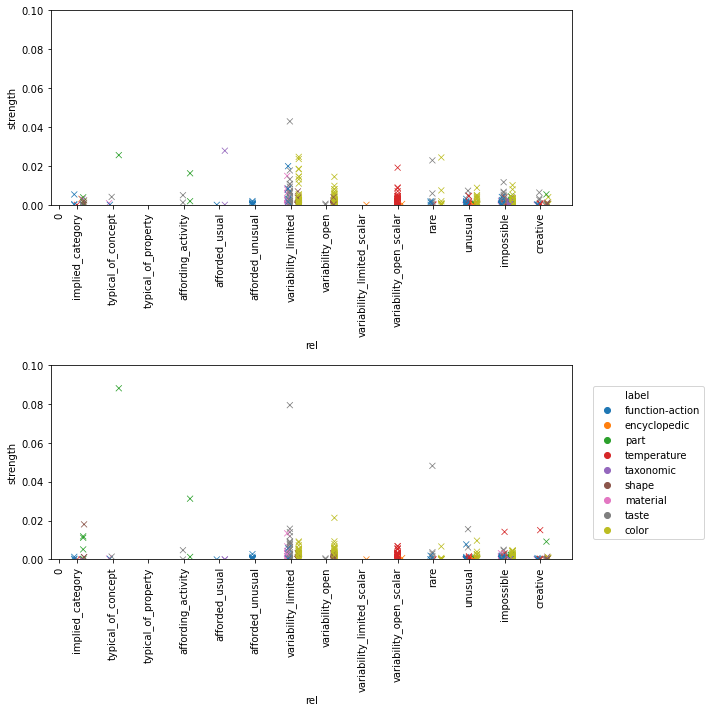

In [287]:
import matplotlib.pyplot as plt
import seaborn as sns

model_names  = ['giga_full_updated',  'wiki_updated']
top_cutoff = 3
concept_cutoff = 3
pair_mode = 'strict'
ets = ['p', 'l', 'n']
ets_str = '_'.join(ets)
properties = get_properties()

# create figure
#fig = plt.figure(figsize=(20, 5), dpi=80)
fig, axes = plt.subplots(ncols=1, nrows=2, figsize=(10, 10))
axes = axes.flatten()

for n, (model_name, ax) in enumerate(zip(model_names, axes), 1):
    df, loc_rel_dict = get_strength_distribution(properties, model_name, pair_mode, ets)
    plt.subplot(2, 1, n)
    g = sns.scatterplot(x='rel', y='strength', data=df, hue='label', marker='x')
    g.set(ylim=(0, 0.1))
    xticks =[0]
    xticklabels = [0]
    xticks.extend(loc_rel_dict.keys())
    xticklabels.extend(loc_rel_dict.values())
    g.set_xticks(xticks)
    g.set_xticklabels(xticklabels)
    g.get_legend().remove()
    plt.xticks(rotation=90)
    axes[n-1] = g
 
plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left", borderaxespad=0)
plt.tight_layout()
plt.savefig(f'../analysis/evidence_strength_relations-{pair_mode}-{ets_str}.png')
plt.show()

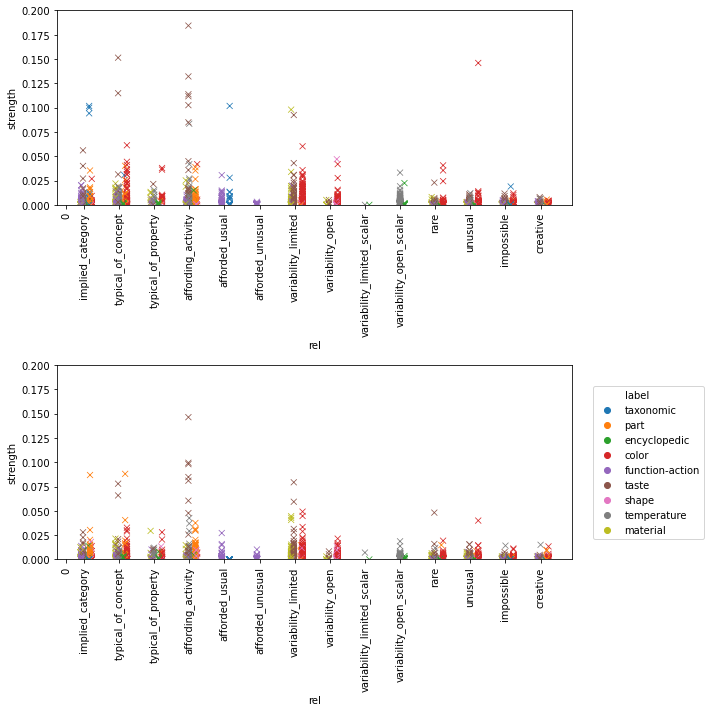

In [288]:
model_names  = ['giga_full_updated',  'wiki_updated']
top_cutoff = 3
concept_cutoff = 3
pair_mode = 'evidence'
ets = ['p', 'l', 'n']

ets_str = '_'.join(ets)
properties = get_properties()


# create figure
#fig = plt.figure(figsize=(20, 5), dpi=80)
fig, axes = plt.subplots(ncols=1, nrows=2, figsize=(10, 10))
axes = axes.flatten()

for n, (model_name, ax) in enumerate(zip(model_names, axes), 1):
    df, loc_rel_dict = get_strength_distribution(properties, model_name, pair_mode, ets)
    plt.subplot(2, 1, n)
    g = sns.scatterplot(x='rel', y='strength', data=df, hue='label', marker='x')
    g.set(ylim=(0, 0.2))
    xticks =[0]
    xticklabels = [0]
    xticks.extend(loc_rel_dict.keys())
    xticklabels.extend(loc_rel_dict.values())
    g.set_xticks(xticks)
    g.set_xticklabels(xticklabels)
    g.get_legend().remove()
    plt.xticks(rotation=90)
    axes[n-1] = g
 
plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left", borderaxespad=0)
plt.tight_layout()
plt.savefig(f'../analysis/evidence_strength_relations-{pair_mode}-{ets_str}.png')
plt.show()

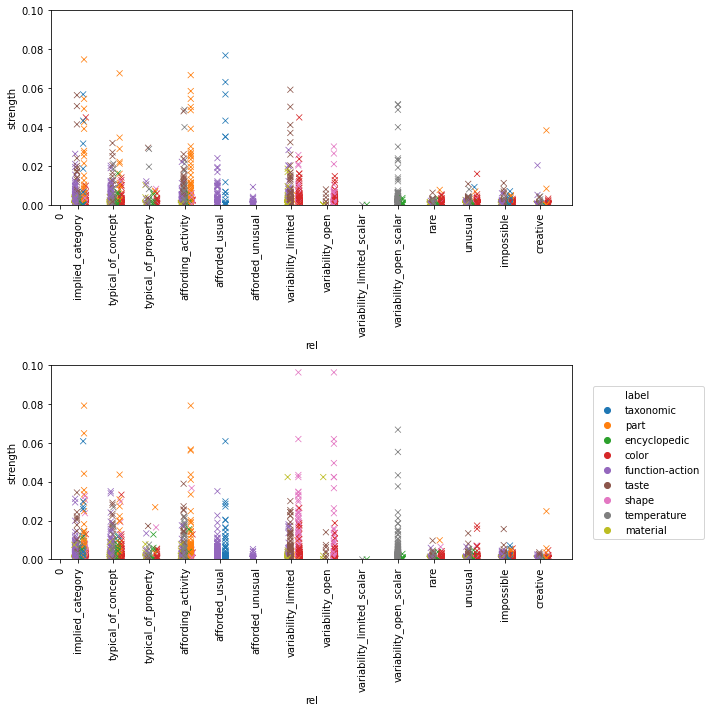

In [290]:
model_names  = ['giga_full_updated',  'wiki_updated']
top_cutoff = 3
concept_cutoff = 3
pair_mode = 'evidence'
ets = ['i', 'r', 'b']
ets_str = '_'.join(ets)
properties = get_properties()

# create figure
#fig = plt.figure(figsize=(20, 5), dpi=80)
fig, axes = plt.subplots(ncols=1, nrows=2, figsize=(10, 10))
axes = axes.flatten()

for n, (model_name, ax) in enumerate(zip(model_names, axes), 1):
    df, loc_rel_dict = get_strength_distribution(properties, model_name, pair_mode, ets)
    plt.subplot(2, 1, n)
    g = sns.scatterplot(x='rel', y='strength', data=df, hue='label', marker='x')
    g.set(ylim=(0, 0.1))
    xticks =[0]
    xticklabels = [0]
    xticks.extend(loc_rel_dict.keys())
    xticklabels.extend(loc_rel_dict.values())
    g.set_xticks(xticks)
    g.set_xticklabels(xticklabels)
    g.get_legend().remove()
    plt.xticks(rotation=90)
    axes[n-1] = g
 
plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left", borderaxespad=0)
plt.tight_layout()
plt.savefig(f'../analysis/evidence_strength_relations-{pair_mode}-{ets_str}.png')
plt.show()

### Step 1: Check isolated relations

* advantage: no interference from other relations
* disadvantage: small number of prop-concept pairs

### Step 2: Check effects of combinations

* impliedness + relation associated with prop mentions should lead to higher values
* typical_of_concept + relation associated with prop mentions should lead to higher values

In [33]:
# overview all relations
model_name  = 'giga_full_updated'
top_cutoff = 3
concept_cutoff = 3
pair_mode = 'strict'
ets = ['p', 'l', 'n']
properties = get_properties()
df = get_strength_overview(properties, model_name, pair_mode, ets)
df.round(6)

,relation,mean_tfidf,n_pairs,examples
0,pos,0.004596,2135,fly-caracara female-mum hot-meat
1,neg,0.001504,1545,sweet-broccoli sweet-oilseed made_of_wood-wheel
2,all,0.005593,1306,fly-caracara female-mum juicy-wintergreen
3,some,0.003027,829,hot-drink cold-toaster round-sauce
4,few,0.001504,1545,sweet-broccoli sweet-oilseed made_of_wood-wheel
5,evidence,0.004503,1731,fly-caracara made_of_wood-wheel hot-meat
6,no_evidence_pos,0.001493,257,yellow-bus roll-windshield black-pyramid
7,no_evidence_neg,0.002340,1692,sweet-broccoli sweet-oilseed female-mum
8,implied_category,0.001294,16,swim-cob wings-cricket swim-bay
9,typical_of_concept,0.007615,4,juicy-meat made_of_wood-club wheels-wheel


In [24]:
model_name  = 'giga_full_updated'
top_cutoff = 3
concept_cutoff = 3
pair_mode = 'evidence'
ets = ['p', 'l', 'n']
#properties = ['warm', 'cold', 'hot']
properties = get_properties()
df = get_strength_overview(properties, model_name, pair_mode, ets)
df.round(6)

,relation,mean_tfidf,n_pairs,examples
0,pos,0.004596,2135,fly-caracara female-mum hot-meat
1,neg,0.001504,1545,sweet-broccoli sweet-oilseed made_of_wood-wheel
2,all,0.005593,1306,fly-caracara female-mum juicy-wintergreen
3,some,0.003027,829,hot-drink cold-toaster round-sauce
4,few,0.001504,1545,sweet-broccoli sweet-oilseed made_of_wood-wheel
5,evidence,0.004873,1525,fly-caracara made_of_wood-wheel hot-meat
6,no_evidence_pos,0.001607,276,yellow-bus roll-windshield black-pyramid
7,no_evidence_neg,0.002268,1879,sweet-broccoli sweet-oilseed female-mum
8,implied_category,0.003849,301,dangerous-bow warm-poncho roll-tire
9,typical_of_concept,0.006323,275,lay_eggs-yellowthroat swim-duck dangerous-racketeer


#### Wikipedia

In [26]:
# overview all relations
model_name  = 'wiki_updated'

top_cutoff = 3
concept_cutoff = 3
pair_mode = 'strict'
ets = ['p', 'l', 'n']
#ets = ['i', 'r', 'b']
properties = get_properties()
df = get_strength_overview(properties, model_name, pair_mode, ets)
df.round(6)

,relation,mean_tfidf,n_pairs,examples
0,pos,0.003268,2135,fly-caracara female-mum hot-meat
1,neg,0.000829,1545,sweet-broccoli sweet-oilseed made_of_wood-wheel
2,all,0.003791,1306,fly-caracara female-mum juicy-wintergreen
3,some,0.002444,829,hot-drink cold-toaster round-sauce
4,few,0.000829,1545,sweet-broccoli sweet-oilseed made_of_wood-wheel
5,evidence,0.004157,1525,fly-caracara made_of_wood-wheel hot-meat
6,no_evidence_pos,0.001727,276,yellow-bus roll-windshield black-pyramid
7,no_evidence_neg,0.000767,1879,sweet-broccoli sweet-oilseed female-mum
8,implied_category,0.003159,16,swim-cob wings-cricket swim-bay
9,typical_of_concept,0.022562,4,juicy-meat made_of_wood-club wheels-wheel


In [28]:
# overview all relations
model_name  = 'wiki_updated'

top_cutoff = 3
concept_cutoff = 3
pair_mode = 'evidence'
ets = ['p', 'l', 'n']
#ets = ['i', 'r', 'b']
properties = get_properties()
df = get_strength_overview(properties, model_name, pair_mode, ets)
df.round(6)

,relation,mean_tfidf,n_pairs,examples
0,pos,0.003268,2135,fly-caracara female-mum hot-meat
1,neg,0.000829,1545,sweet-broccoli sweet-oilseed made_of_wood-wheel
2,all,0.003791,1306,fly-caracara female-mum juicy-wintergreen
3,some,0.002444,829,hot-drink cold-toaster round-sauce
4,few,0.000829,1545,sweet-broccoli sweet-oilseed made_of_wood-wheel
5,evidence,0.004157,1525,fly-caracara made_of_wood-wheel hot-meat
6,no_evidence_pos,0.001727,276,yellow-bus roll-windshield black-pyramid
7,no_evidence_neg,0.000767,1879,sweet-broccoli sweet-oilseed female-mum
8,implied_category,0.002786,301,dangerous-bow warm-poncho roll-tire
9,typical_of_concept,0.005252,275,lay_eggs-yellowthroat swim-duck dangerous-racketeer


### Load combined tables for latex

In [9]:
path_strict = '../analysis/evidence_strength_relations-strict.csv'

df = pd.read_csv(path_strict)
print(df.round(4).to_latex(index=False))

\begin{tabular}{lrrr}
\toprule
                   relation &  giga\_full\_updated &  wiki\_updated &  n\_pairs \\
\midrule
                        pos &             0.0046 &        0.0033 &     2135 \\
                        neg &             0.0015 &        0.0008 &     1545 \\
                        all &             0.0056 &        0.0038 &     1306 \\
                       some &             0.0030 &        0.0024 &      829 \\
                        few &             0.0015 &        0.0008 &     1545 \\
                   evidence &             0.0045 &        0.0042 &     1525 \\
            no\_evidence\_pos &             0.0015 &        0.0017 &      276 \\
            no\_evidence\_neg &             0.0023 &        0.0008 &     1879 \\
           implied\_category &             0.0013 &        0.0032 &       16 \\
         typical\_of\_concept &             0.0076 &        0.0226 &        4 \\
        typical\_of\_property &             0.0000 &        0.0000 &        0 \\

In [12]:
path_strict = '../analysis/evidence_strength_relations-strict-evidence.csv'

df = pd.read_csv(path_strict)
print(df.round(4).to_latex(index=False))

\begin{tabular}{lrrrrrr}
\toprule
                   relation &  giga\_full\_updated-strict &  wiki\_updated-strict &  giga\_full\_updated-evidence &  wiki\_updated-evidence &  n\_pairs-strict &  n\_pairs-evidence \\
\midrule
                        pos &                    0.0046 &               0.0033 &                      0.0046 &                 0.0033 &            2135 &              2135 \\
                        neg &                    0.0015 &               0.0008 &                      0.0015 &                 0.0008 &            1545 &              1545 \\
                        all &                    0.0056 &               0.0038 &                      0.0056 &                 0.0038 &            1306 &              1306 \\
                       some &                    0.0030 &               0.0024 &                      0.0030 &                 0.0024 &             829 &               829 \\
                        few &                    0.0015 &               0.

### Relation interations

#### Impliedness:

* implied_category should have a low mean tfidf value
* Observation: Clearly lower than mean pos value, closer to mean neg value

In [9]:
model_name = 'giga_full_updated'
combination = ('implied_category',)

pairs =  load_relation_pairs(combination, order=False)

print(len(pairs))
means = []
for prop, concept in pairs:
    means.append(get_tfidf_pair(ets, prop, concept, model_name, top_cutoff, concept_cutoff))
print(sum(means)/len(means))

16
0.001293715807821446


In [13]:
combination = ('implied_category', 'typical_of_concept')

pairs =  load_relation_pairs(combination, order=False)
print(len(pairs))
means = []
for prop, concept in pairs:
    means.append(get_tfidf_pair(ets, prop, concept, model_name, top_cutoff, concept_cutoff))
print(sum(means)/len(means))

13
0.005421057460307748


In [12]:
combination = ('typical_of_concept', 'implied_category')

pairs =  load_relation_pairs(combination, order=True)
print(len(pairs))
means = []
for prop, concept in pairs:
    means.append(get_tfidf_pair(ets, prop, concept, model_name, top_cutoff, concept_cutoff))
print(sum(means)/len(means))

6
0.010847462731661482


In [17]:
combination = ('typical_of_concept', 'implied_category')

pairs =  load_relation_pairs(combination, order=True)
print(pairs)

{('wings', 'weaver'), ('dangerous', 'hippopotamus'), ('yellow', 'yolk'), ('yellow', 'buttercup'), ('dangerous', 'phencyclidine'), ('black', 'housefly')}


In [14]:
combination = ('implied_category', 'typical_of_concept')

pairs =  load_relation_pairs(combination, order=True)
print(len(pairs))
means = []
for prop, concept in pairs:
    means.append(get_tfidf_pair(ets, prop, concept, model_name, top_cutoff, concept_cutoff))
print(sum(means)/len(means))

7
0.0007698529420045495


In [16]:
combination = ('implied_category', 'typical_of_concept')

pairs =  load_relation_pairs(combination, order=True)
print(pairs)

{('dangerous', 'morphine'), ('wings', 'weka'), ('round', 'coconut'), ('dangerous', 'adze'), ('round', 'cucurbit'), ('wings', 'cock'), ('black', 'pupil')}


#### Variability

* variability_limited should have a high mean tfidf value
* variability_open should have a low mean tfidf value

* Observations:


In [20]:
combination = ('variability_limited', )
combinations = [set(combination)]
relation_pair_dict = get_relation_combinations(properties, combinations)
pairs = relation_pair_dict[combination]
print(len(pairs))
means = []
for prop, concept in pairs:
    means.append(get_tfidf_pair(ets, prop, concept, model_name, top_cutoff, concept_cutoff))
print(sum(means)/len(means))

114
0.003956634603549042


In [21]:
combination = ('variability_open', )
combinations = [set(combination)]
relation_pair_dict = get_relation_combinations(properties, combinations)
pairs = relation_pair_dict[combination]
print(len(pairs))
means = []
for prop, concept in pairs:
    means.append(get_tfidf_pair(prop, concept, model_name, top_cutoff, concept_cutoff))
print(sum(means)/len(means))

175
0.0017967697773990463


#### Variability in combination with impliedness should overrule impliedness

In [84]:
combination = ['implied_category']
combinations = [combination]
relation_pair_dict = get_relation_combinations(properties, combinations)
pairs = relation_pair_dict[combination]

combinations = [set(combination)]
relation_pair_dict = get_relation_combinations(properties, combinations, rel_select = 'strict')
pairs = relation_pair_dict[combination]
    
print(len(pairs))
means = []
for prop, concept in pairs:
    means.append(get_tfidf_pair(prop, concept, model_name, top_cutoff, concept_cutoff))
print(sum(means)/len(means))

TypeError: unhashable type: 'list'

In [24]:
combination = ('implied_category', 'variability_limited')
combinations = [set(combination)]
relation_pair_dict = get_relation_combinations(properties, combinations)
pairs = relation_pair_dict[combination]
print(pairs)
print(len(pairs))
means = []
for prop, concept in pairs:
    means.append(get_tfidf_pair(prop, concept, model_name, top_cutoff, concept_cutoff))
print(sum(means)/len(means))

{('square', 'laptop'), ('red', 'tongue'), ('sweet', 'breadfruit'), ('green', 'fenugreek'), ('made_of_wood', 'ladle'), ('fly', 'fowl'), ('made_of_wood', 'transom'), ('round', 'cabbage'), ('sweet', 'carrot'), ('round', 'onion'), ('round', 'sapodilla'), ('roll', 'cart'), ('round', 'nutlet'), ('round', 'gourd'), ('wings', 'beetle'), ('made_of_wood', 'girder'), ('round', 'lemon'), ('square', 'computer'), ('square', 'blackboard'), ('juicy', 'anjou'), ('round', 'pineapple')}
21
0.001578340098725068


In [25]:
combination = ('variability_limited', )
combinations = [set(combination)]
relation_pair_dict = get_relation_combinations(properties, combinations)
pairs = relation_pair_dict[combination]
print(pairs)

{('yellow', 'nectarine'), ('made_of_wood', 'bass'), ('juicy', 'corn'), ('green', 'serviceberry'), ('roll', 'paint'), ('made_of_wood', 'roof'), ('black', 'calf'), ('yellow', 'peach'), ('blue', 'shark'), ('round', 'banjo'), ('made_of_wood', 'railing'), ('made_of_wood', 'mop'), ('red', 'ambulance'), ('round', 'pecan'), ('black', 'millipede'), ('fly', 'craft'), ('made_of_wood', 'axe'), ('juicy', 'chicken'), ('blue', 'dogbane'), ('square', 'desk'), ('juicy', 'doughnut'), ('red', 'leafs'), ('green', 'strawberry'), ('juicy', 'bean'), ('sweet', 'beetroot'), ('juicy', 'ham'), ('blue', 'starling'), ('black', 'sapsucker'), ('black', 'bear'), ('black', 'sky'), ('fly', 'capsule'), ('yellow', 'daisy'), ('black', 'penguin'), ('made_of_wood', 'beam'), ('green', 'chutney'), ('black', 'truffle'), ('red', 'lentil'), ('black', 'human'), ('red', 'carnation'), ('juicy', 'date'), ('roll', 'mandrel'), ('red', 'ant'), ('used_in_cooking', 'cake'), ('juicy', 'beet'), ('square', 'footrest'), ('juicy', 'ginger'), 

In [26]:
combination = ('implied_category', 'variability_open')
combinations = [set(combination)]
relation_pair_dict = get_relation_combinations(properties, combinations)
pairs = relation_pair_dict[combination]
print(len(pairs))
means = []
for prop, concept in pairs:
    means.append(get_tfidf_pair(prop, concept, model_name, top_cutoff, concept_cutoff))
print(sum(means)/len(means))

6
0.0016937395316195085


#### Typicality

* typical_of_property should have higher values
* typical_of_concept should have lower values
* problem: they are unlikely to occur independently from one another

In [27]:
combination = ('typical_of_property', )
combinations = [set(combination)]
relation_pair_dict = get_relation_combinations(properties, combinations)
pairs = relation_pair_dict[combination]
print(len(pairs))
means = []
for prop, concept in pairs:
    means.append(get_tfidf_pair(prop, concept, model_name, top_cutoff, concept_cutoff))
print(sum(means)/len(means))

0


ZeroDivisionError: division by zero

In [28]:
combination = ('typical_of_concept', )
combinations = [set(combination)]
relation_pair_dict = get_relation_combinations(properties, combinations)
pairs = relation_pair_dict[combination]
print(len(pairs))
means = []
for prop, concept in pairs:
    means.append(get_tfidf_pair(prop, concept, model_name, top_cutoff, concept_cutoff))
print(sum(means)/len(means))

4
0.007614649891454527


#### Affordedness

In [29]:
combination = ('afforded_usual', )
combinations = [set(combination)]
relation_pair_dict = get_relation_combinations(properties, combinations)
pairs = relation_pair_dict[combination]
print(len(pairs))
means = []
for prop, concept in pairs:
    means.append(get_tfidf_pair(prop, concept, model_name, top_cutoff, concept_cutoff))
print(sum(means)/len(means))

3
0.00927845165257774


In [30]:
combination = ('afforded_unusual', )
combinations = [set(combination)]
relation_pair_dict = get_relation_combinations(properties, combinations)
pairs = relation_pair_dict[combination]
print(len(pairs))
means = []
for prop, concept in pairs:
    means.append(get_tfidf_pair(prop, concept, model_name, top_cutoff, concept_cutoff))
print(sum(means)/len(means))

20
0.00039111772001438174


In [31]:
combination = ('affording_activity', )
combinations = [set(combination)]
relation_pair_dict = get_relation_combinations(properties, combinations)
pairs = relation_pair_dict[combination]
print(len(pairs))
means = []
for prop, concept in pairs:
    means.append(get_tfidf_pair(prop, concept, model_name, top_cutoff, concept_cutoff))
print(sum(means)/len(means))

4
0.006053307639432479


#### Affordedness relations + other relations

*affording_activity*

In [32]:
combination = ('affording_activity', 'implied_category')
combinations = [set(combination)]
relation_pair_dict = get_relation_combinations(properties, combinations)
pairs = relation_pair_dict[combination]
print(len(pairs))
print(pairs)
means = []
for prop, concept in pairs:
    means.append(get_tfidf_pair(prop, concept, model_name, top_cutoff, concept_cutoff))
print(sum(means)/len(means))

8
{('made_of_wood', 'bamboo'), ('wheels', 'dumper'), ('warm', 'tunic'), ('wheels', 'snowplow'), ('hot', 'lightning'), ('wheels', 'equipage'), ('warm', 'calfskin'), ('wheels', 'airplane')}
0.004585447563000917


In [33]:
combination = ('affording_activity', 'typical_of_concept')
combinations = [set(combination)]
relation_pair_dict = get_relation_combinations(properties, combinations)
pairs = relation_pair_dict[combination]
print(len(pairs))
means = []
for prop, concept in pairs:
    means.append(get_tfidf_pair(prop, concept, model_name, top_cutoff, concept_cutoff))
print(sum(means)/len(means))

5
0.004864331820770777


In [34]:
combination = ('affording_activity', 'implied_category', 'typical_of_concept')
combinations = [set(combination)]
relation_pair_dict = get_relation_combinations(properties, combinations)
pairs = relation_pair_dict[combination]
print(len(pairs))
means = []
for prop, concept in pairs:
    means.append(get_tfidf_pair(prop, concept, model_name, top_cutoff, concept_cutoff))
print(sum(means)/len(means))

57
0.0021921960452967494


*afforded_usual*

In [138]:
combination = ('afforded_usual', 'implied_category')
combinations = [set(combination)]
relation_pair_dict = get_relation_combinations(properties, combinations)
pairs = relation_pair_dict[combination]
print(len(pairs))
means = []
for prop, concept in pairs:
    means.append(get_tfidf_pair(prop, concept, model_name, top_cutoff, concept_cutoff))
print(sum(means)/len(means))

18
0.025247162010199574


In [ ]:
## backup 

def get_relation_combinations(properties, combinations, rel_select = 'strict', order=True):
    
    rels_evidence = {'typical_of_property', 'variability_limited',  'afforded_usual', 'affording_activity'}
    rels_no_evidence = {'typical_of_concept', 'afforded_unusual', 'implied_category', 'variability_open',
                       'rare', 'unusual', 'impossible', 'creative'}
    
    relation_pair_dict = defaultdict(set)
    for prop in properties:
        prop_dict = analyze_evidence.load_prop_data(prop)
        for c, d in prop_dict.items():
            ml_label = d['ml_label']
            if ml_label in {'all', 'some', 'all-some', 'few-some'}:
                l = 'pos'
            elif ml_label in {'few'}:
                l = 'neg' 
            relation_pair_dict[(l,)].add((prop, c))
            if ml_label in {'all', 'all-some'}:
                l_qu = 'all'
            elif ml_label in {'some', 'few-some'}:
                l_qu = 'some'
            elif ml_label in {'few'}:
                l_qu = 'few'
            relation_pair_dict[(l_qu,)].add((prop, c))
            rel_dict = d['relations']
            for combination in combinations:
                # sort relations:
                prop_rel_dict = defaultdict(list)
                for rel, p in rel_dict.items():
                    prop_rel_dict[p].append(rel)
                pos_props = sorted(list(prop_rel_dict.keys()), reverse=True)
                if rel_select == 'strict':
                    relations = []
                    for p in pos_props:
                        if p > 0.5:
                            relations.extend(prop_rel_dict[p])
                elif type(rel_select) == tuple:
                    upper, min_dist = rel_select
                    
                    top = pos_props[0]
                    if len(pos_props) > 1:
                        second = pos_props[1]
                    else:
                        second = 0.0
                    dist = top - second
                    if top > upper and dist > min_dist:
                        relations = set(prop_rel_dict[top])
                    else:
                        relations = set()
                elif rel_select == 'hypotheses':
                    relations_all = set([rel for rel, p in rel_dict.items() if p > 0.5])
                    rel_evidence = [rel for rel in relations_all if rel in rels_evidence]
                    rel_no_evidence = [rel for rel in relations_all if rel in rels_no_evidence]
                    if len(rel_evidence) == 1:
                        relations = set(rel_evidence)
                    elif len(rel_evidence) == 0 and len(rel_no_evidence) == 1:
                        relations = set(rel_no_evidence)
                    else:
                        relations = []
                if order == True:
                    combination = (combination)
                else:
                    relations = set(relations)
                    combination = set(combination)
    
                if combination == relations:
                    l_comb = tuple(relations)
                    relation_pair_dict[l_comb].add((prop, c))
    return relation_pair_dict 